In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot

['C:\\Users\\Dead\\anaconda3\\lib\\site-packages\\pandas']

In [294]:
filepath = ".\\grains_production_india_from_2001_to_2017.csv"
grainProd = pd.read_csv(filepath)
grainProd.columns = [nm.lower() for nm in grainProd.columns]
grainProd

,year,food grains (cereals) - rice (000 tonnes),food grains (cereals) - jowar (000 tonnes),food grains (cereals) - bajra (000 tonnes),food grains (cereals) - maize (000 tonnes),food grains (cereals) - ragi (000 tonnes),food grains (cereals) - small millets (000 tonnes),food grains (cereals) - wheat (000 tonnes),food grains (cereals) - barley (000 tonnes),food grains (cereals) - total (000 tonnes),...,natural rubber (000 mt),banana (000 tonnes),sugarcane (000 tonnes),tobacco (000 tonnes),potatoes (000 tonnes),black pepper (000 tonnes),chillies (000 tonnes),ginger (000 tonnes),coconut (000 tonnes),turmeric (000 tonnes)
0,2001-02,93340,7557,8284,13160,2375,577,72766.0,1425.0,199483,...,631.00,13160.0,297208.0,546.0,23924.0,62.0,1069.0,322.0,12963.0,563.0
1,2002-03,71820,7012,4719,11152,1316,459,65761.0,1407.0,163646,...,649.00,11975.0,287383.0,500.0,23269.0,72.0,895.0,280.0,12535.0,522.0
2,2003-04,88526,6681,12109,14984,1966,564,72156.0,1298.0,198284,...,712.00,11388.0,233862.0,550.0,23060.0,73.0,1236.0,302.0,12178.0,565.0
3,2004-05,83132,7244,7931,14172,2432,478,68637.0,1207.0,185233,...,750.00,11710.0,237088.0,549.0,23631.0,73.0,1186.0,359.0,12833.0,718.0
4,2005-06,91793,7630,7684,14710,2354,472,69355.0,1221.0,195217,...,803.00,12105.0,281172.0,552.0,23905.0,93.0,1015.0,391.0,14811.0,852.0
5,2006-07,93355,7151,8424,15097,1444,480,75807.0,1328.0,203085,...,853.00,16609.0,355520.0,469.0,22181.0,69.0,1242.0,393.0,15840.0,787.0
6,2007-08,96693,7926,9970,18955,2152,551,78570.0,1196.0,216014,...,825.00,23823.0,348188.0,437.0,34658.0,50.0,1371.0,775.0,10148.0,884.0
7,2008-09,99172,7246,8887,19731,2040,445,80679.0,1689.0,219889,...,865.00,26217.0,285029.0,569.0,34391.0,50.0,1382.0,832.0,10148.0,895.0
8,2009-10,89083,6698,6506,16720,1889,382,80804.0,1355.0,203435,...,831.00,26470.0,292302.0,665.0,36577.0,50.0,1470.0,708.0,10824.0,928.0
9,2010-11,95970,7003,10370,21726,2194,442,86874.0,1663.0,226241,...,862.00,29780.0,342382.0,802.0,42339.0,52.0,1223.0,702.0,10840.0,993.0


In [342]:
foodGrains = grainProd[["year", *[i for i in grainProd.columns if "food grains" in i and "total" not in i]]]
foodGrains.set_index("year", inplace = True)
foodGrains.columns = ["".join(i.split()[4:-2]) for i in foodGrains.columns]
foodGrains

,rice,jowar,bajra,maize,ragi,smallmillets,wheat,barley,gram,tur,otherpulses
year,,,,,,,,,,,
2001-02,93340,7557,8284,13160,2375,577,72766.0,1425.0,5473.0,2260,5635
2002-03,71820,7012,4719,11152,1316,459,65761.0,1407.0,4237.0,2186,4702
2003-04,88526,6681,12109,14984,1966,564,72156.0,1298.0,5718.0,2356,6831
2004-05,83132,7244,7931,14172,2432,478,68637.0,1207.0,5469.0,2347,5314
2005-06,91793,7630,7684,14710,2354,472,69355.0,1221.0,5600.0,2738,5046
2006-07,93355,7151,8424,15097,1444,480,75807.0,1328.0,6334.0,2314,5550
2007-08,96693,7926,9970,18955,2152,551,78570.0,1196.0,5749.0,3076,5937
2008-09,99172,7246,8887,19731,2040,445,80679.0,1689.0,7060.0,2266,5240
2009-10,89083,6698,6506,16720,1889,382,80804.0,1355.0,7476.0,2465,4720


In [452]:
columnMeans = foodGrains.mean()
foodGrains = foodGrains.fillna(columnMeans)
stDevs = foodGrains.std(axis = 0, skipna = True)
grainNormalised = (foodGrains - columnMeans)/stDevs
grainNormalised.reset_index(inplace = True)
grainNormalised

,year,rice,jowar,bajra,maize,ragi,smallmillets,wheat,barley,gram,tur,otherpulses
0,2001-02,-0.200772,0.857688,-0.238997,-1.261159,1.299018,1.810547,-0.830497,-0.243460,-0.943500,-0.841623,-0.271511
1,2002-03,-2.481229,0.477772,-2.368396,-1.746957,-2.010343,0.073599,-1.533200,-0.332411,-1.826736,-0.981638,-1.282013
2,2003-04,-0.710908,0.247033,2.045701,-0.819876,0.020898,1.619189,-0.891689,-0.871054,-0.768425,-0.659983,1.023837
3,2004-05,-1.282505,0.639498,-0.449847,-1.016324,1.477142,0.353278,-1.244696,-1.320747,-0.946358,-0.677012,-0.619176
4,2005-06,-0.364706,0.908576,-0.597381,-0.886165,1.233393,0.264958,-1.172670,-1.251563,-0.852747,0.062794,-0.909438
5,2006-07,-0.199182,0.574668,-0.155374,-0.792537,-1.610345,0.382717,-0.525441,-0.722803,-0.328236,-0.739451,-0.363572
6,2007-08,0.154543,1.114916,0.768062,0.140834,0.602146,1.427830,-0.248272,-1.375106,-0.746272,0.702319,0.055575
7,2008-09,0.417240,0.640892,0.121179,0.328573,0.252147,-0.132479,-0.036708,1.061144,0.190558,-0.830271,-0.699323
8,2009-10,-0.651883,0.258884,-1.301009,-0.399883,-0.219726,-1.059833,-0.024169,-0.589378,0.487828,-0.453746,-1.262518
9,2010-11,0.077927,0.471498,1.006985,0.811227,0.733395,-0.176639,0.584740,0.932660,1.020200,0.295520,1.379083


In [453]:
grainLongForm = grainNormalised.melt("year", var_name = "foodgrain", value_name = "production")
grainLongForm

,year,foodgrain,production
0,2001-02,rice,-0.200772
1,2002-03,rice,-2.481229
2,2003-04,rice,-0.710908
3,2004-05,rice,-1.282505
4,2005-06,rice,-0.364706
...,...,...,...
171,2012-13,otherpulses,0.650179
172,2013-14,otherpulses,0.724910
173,2014-15,otherpulses,1.220955
174,2015-16,otherpulses,1.033584


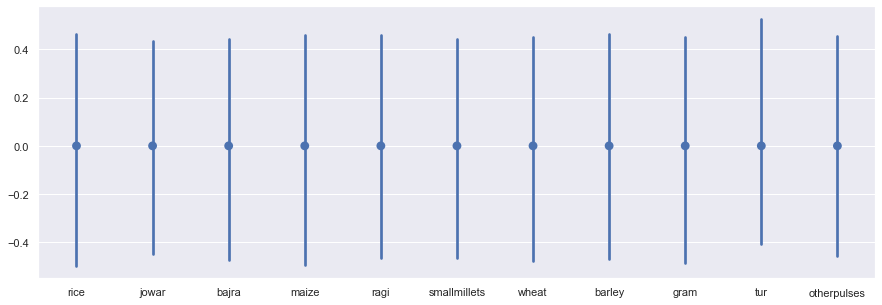

In [458]:
sns.pointplot(data = grainNormalised, dodge = True, join = False)
# sns.pointplot(data=grainLongForm, dodge=True, join=False, x = "production", y = "foodgrain")
sns.set(rc = {'figure.figsize':(15,5)})

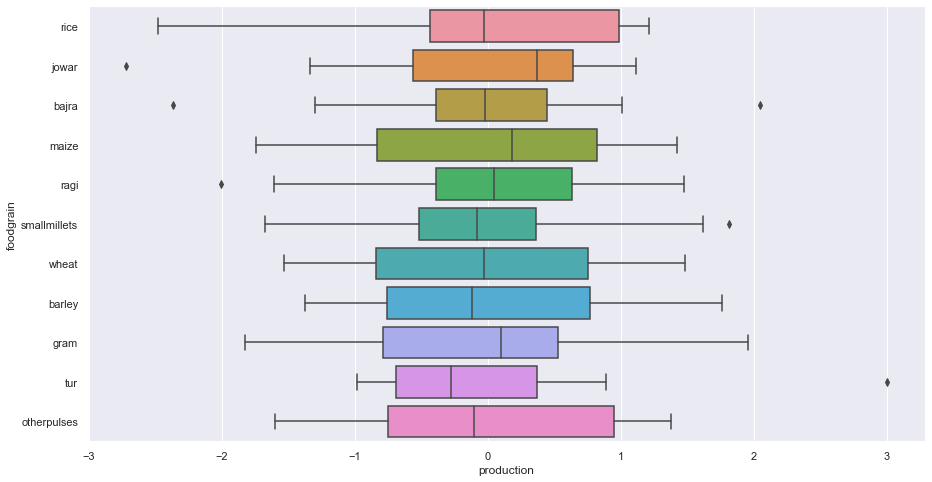

In [462]:
# sns.boxplot(data=grainNormalised)
sns.boxplot(data=grainLongForm, y = "foodgrain", x = "production")
sns.set(rc = {'figure.figsize':(15,8)})

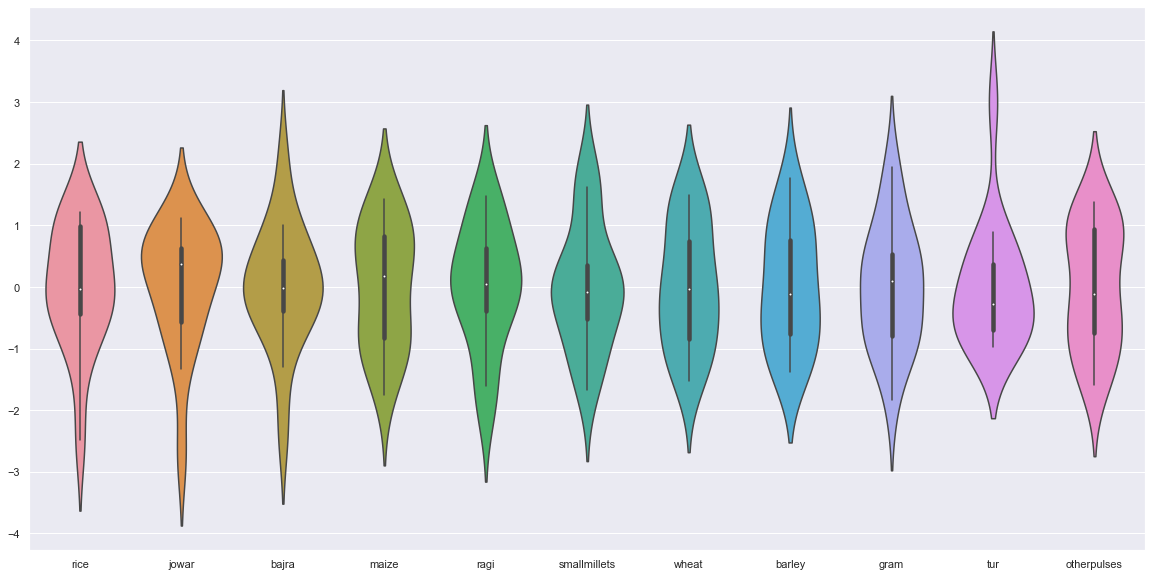

In [470]:
sns.violinplot(data=grainNormalised)
# sns.violinplot(data=grainLongForm, y = "foodgrain", x = "production")
sns.set(rc = {'figure.figsize':(20,10)})

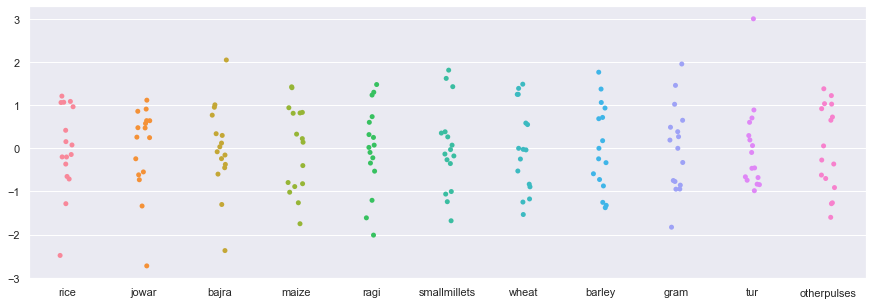

In [475]:
sns.stripplot(data = grainNormalised)
# sns.stripplot(data=grainLongForm, y = "foodgrain", x = "production")
sns.set(rc = {'figure.figsize':(15,5)})

<AxesSubplot:>

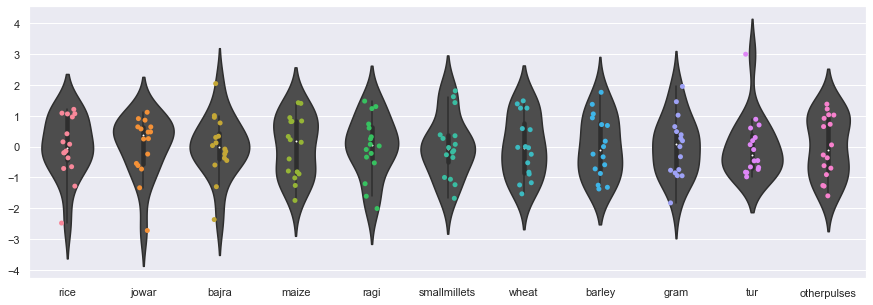

In [476]:
sns.violinplot(data=grainNormalised, color = "0.3")
sns.stripplot(data=grainNormalised)

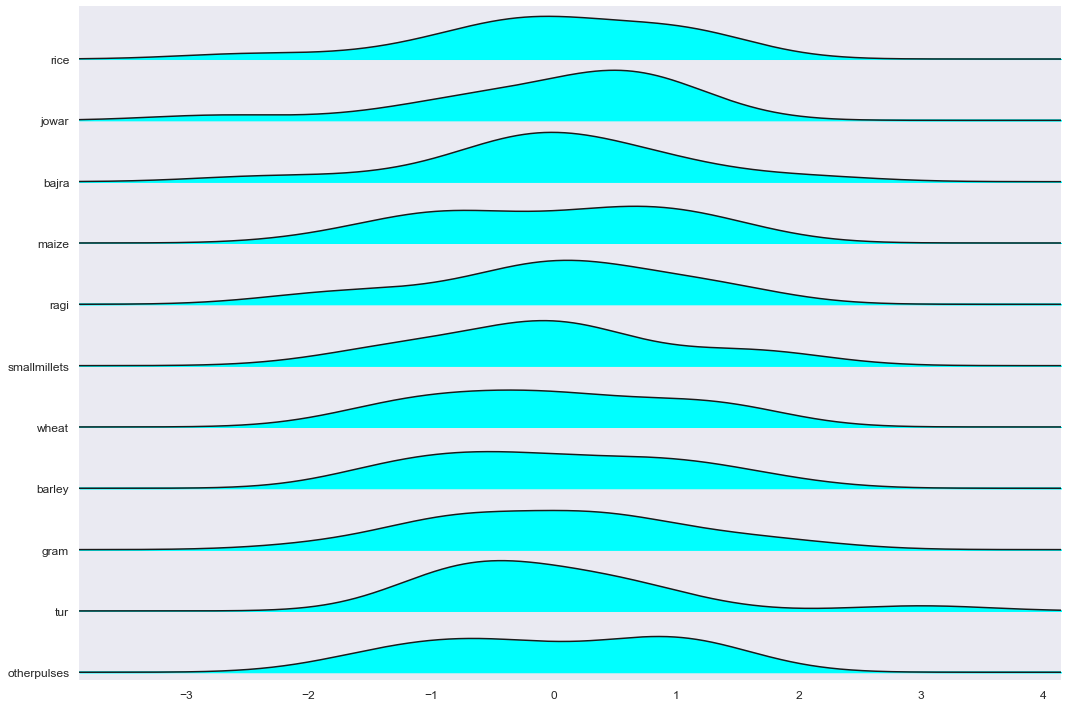

In [478]:
joyplot(grainNormalised,overlap = 0, color = "aqua")
sns.set(rc = {'figure.figsize':(15,10)})

In [135]:
oilseeds = grainProd[["year", *[i for i in grainProd.columns if "oilseeds" in i and "total" not in i]]]
oilseeds.set_index("year", inplace = True)
oilseeds.columns = ["".join(i.split()[2:-2]) for i in oilseeds.columns]
oilseeds

,ground-nuts,sesamum,rapeseedandmustard,linseed,castorseed
year,,,,,
2001-02,7028,698,5083.0,209.0,653
2002-03,4121,441,3880.0,177.0,428
2003-04,8127,782,6291.0,197.0,797
2004-05,6774,674,7593.0,170.0,793
2005-06,7993,641,8131.0,173.0,991
2006-07,4864,618,7438.0,168.0,762
2007-08,9183,757,5834.0,163.0,1054
2008-09,7168,640,7201.0,169.0,1171
2009-10,5428,588,6608.0,154.0,1009


In [480]:
columnMean = oilseeds.mean()
oilseeds = oilseeds.fillna(columnMean)
stdDev = oilseeds.std(axis = 0, skipna = True)
seedNormalised = (oilseeds - columnMean)/stdDev
seedNormalised.reset_index(inplace = True)
seedNormalised

,year,ground-nuts,sesamum,rapeseedandmustard,linseed,castorseed
0,2001-02,0.057732,-0.077854,-1.458461,2.302055,-1.122238
1,2002-03,-1.790340,-2.316580,-2.486265,0.669874,-1.534615
2,2003-04,0.756402,0.653869,-0.426386,1.689987,-0.858317
3,2004-05,-0.103743,-0.286918,0.686000,0.312835,-0.865648
4,2005-06,0.671214,-0.574381,1.145649,0.465852,-0.502756
5,2006-07,-1.317991,-0.774734,0.553573,0.210823,-0.922464
6,2007-08,1.427734,0.436094,-0.816832,-0.044205,-0.387291
7,2008-09,0.146735,-0.583092,0.351088,0.261829,-0.172855
8,2009-10,-0.959439,-1.036064,-0.155552,-0.503256,-0.469766
9,2010-11,0.844768,1.620789,1.186659,-0.860295,0.155214


In [481]:
seedLongForm = seedNormalised.melt("year", var_name = "oilseed", value_name = "production")
seedLongForm

,year,oilseed,production
0,2001-02,ground-nuts,0.057732
1,2002-03,ground-nuts,-1.790340
2,2003-04,ground-nuts,0.756402
3,2004-05,ground-nuts,-0.103743
4,2005-06,ground-nuts,0.671214
...,...,...,...
75,2012-13,castorseed,1.280545
76,2013-14,castorseed,0.846175
77,2014-15,castorseed,1.108263
78,2015-16,castorseed,0.705050


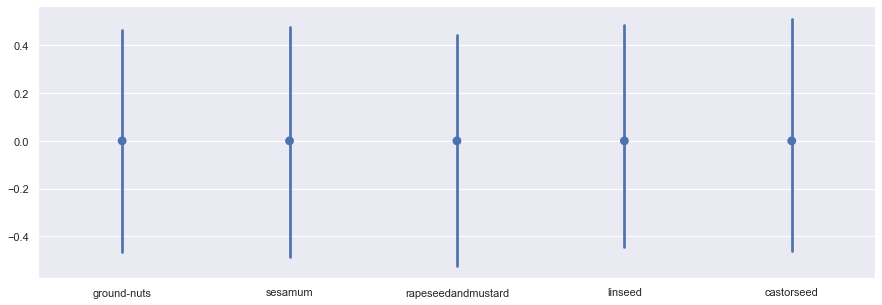

In [485]:
sns.pointplot(data=seedNormalised, dodge=True, join=False)
# sns.pointplot(data=seedLongForm, dodge = True, join = False, x = "production", y = "oilseed")
sns.set(rc = {'figure.figsize':(15,5)})

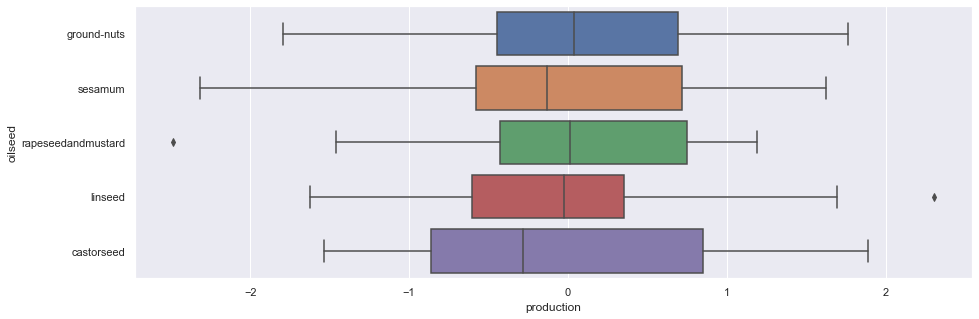

In [492]:
# sns.boxplot(data=seedNormalised)
sns.boxplot(data=seedLongForm, x = "production", y = "oilseed")
sns.set(rc = {'figure.figsize':(15,5)})

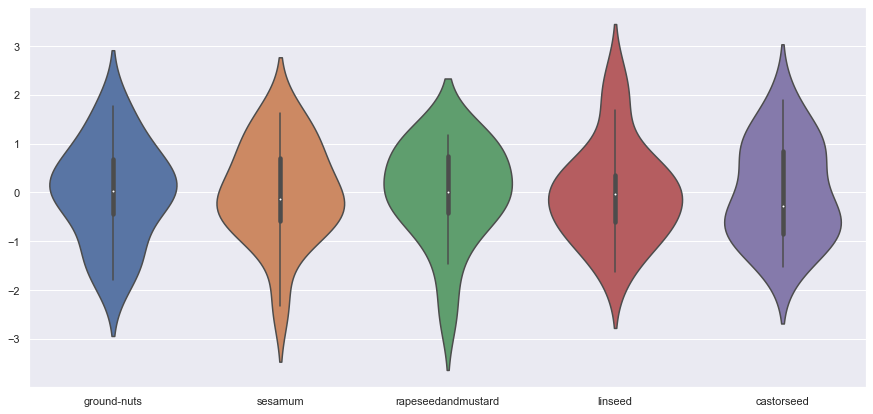

In [499]:
sns.violinplot(data=seedNormalised)
# sns.violinplot(data=seedLongForm, x="production", y = "oilseed")
sns.set(rc = {'figure.figsize':(15,7)})

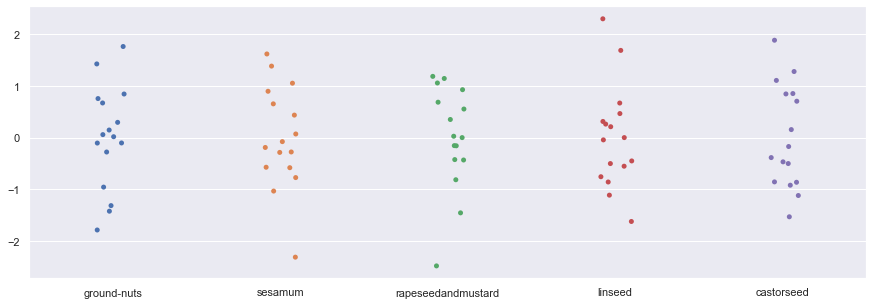

In [505]:
sns.stripplot(data=seedNormalised)
# sns.stripplot(data=seedLongForm, x="production", y = "oilseed")
sns.set(rc = {'figure.figsize':(15,5)})

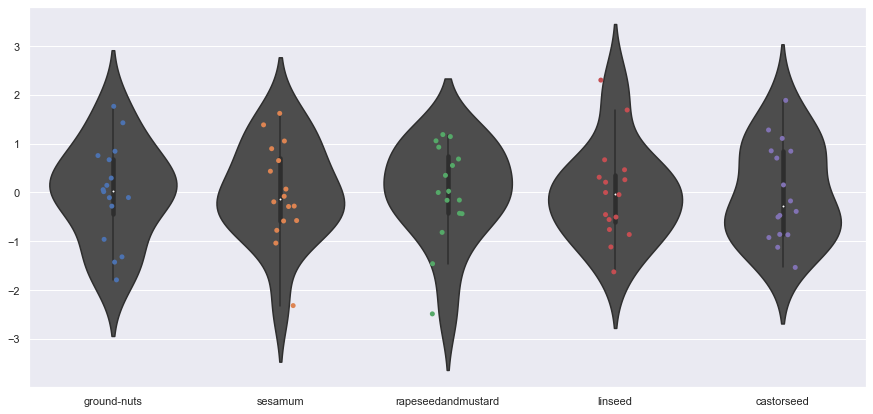

In [509]:
sns.violinplot(data=seedNormalised, color = "0.3")
sns.stripplot(data=seedNormalised)
sns.set(rc = {'figure.figsize':(15,7)})

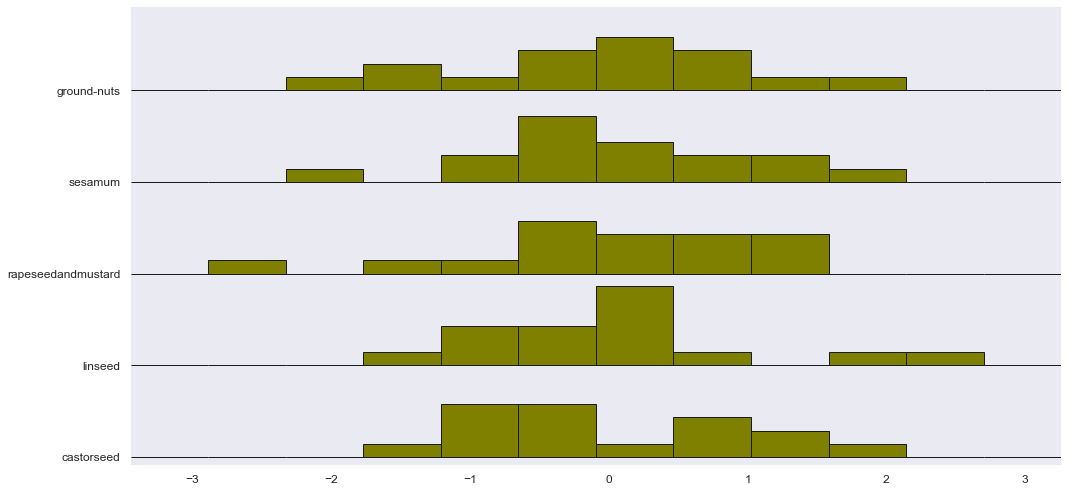

In [510]:
joyplot(seedNormalised,overlap = 0, color = "olive", hist = True, bins = 12)
sns.set(rc = {'figure.figsize':(15,8)})